**problem Statement**

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
#sns.pairplot(df)

In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


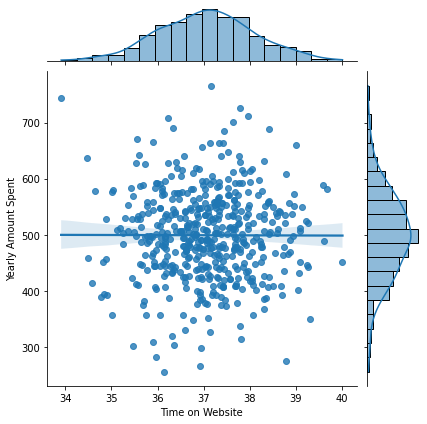

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='reg')

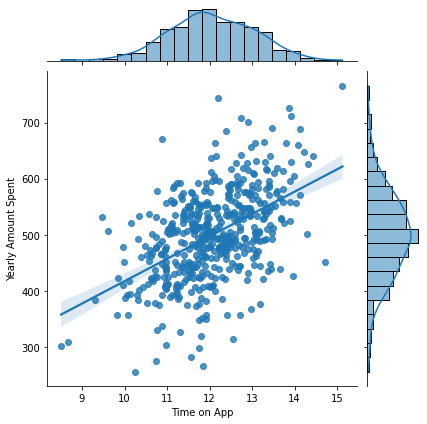

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=df,kind='reg')

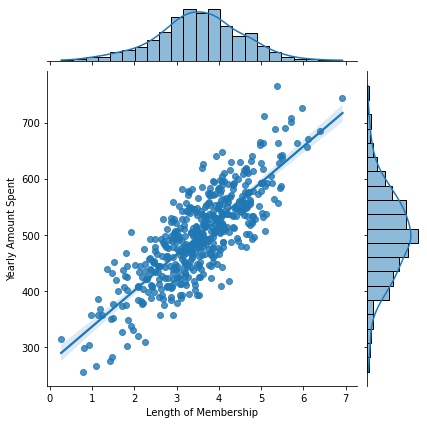

In [ ]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df,kind='reg')

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
df=df.drop(columns=['Email', 'Address', 'Avatar'],axis=1)
df.shape

(500, 5)

In [ ]:
x=df.iloc[:,:-1]
y=df['Yearly Amount Spent']
print(x.shape)
print(y.shape)

(500, 4)
(500,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 4)
(150, 4)
(350,)
(150,)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model= LinearRegression()
train=model.fit(x_train,y_train)

In [ ]:
print(model.coef_)

[25.67128004 38.70819291  0.20742337 61.78910122]


In [ ]:
predtrain=model.predict(x_train)
predtest=model.predict(x_test)

Text(0.5, 1.0, 'test vs predict')

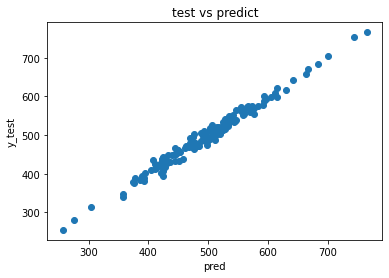

In [ ]:
plt.pyplot.scatter(y_test,predtest)
plt.pyplot.ylabel("y_test")
plt.pyplot.xlabel("pred")
plt.pyplot.title("test vs predict")

Text(0.5, 1.0, 'train vs predict')

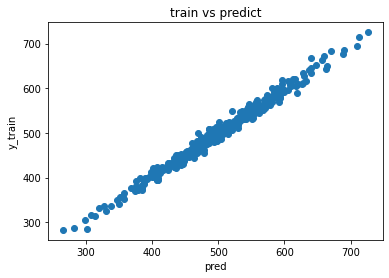

In [ ]:
plt.pyplot.scatter(y_train,predtrain)
plt.pyplot.ylabel("y_train")
plt.pyplot.xlabel("pred")
plt.pyplot.title("train vs predict")

In [ ]:
from sklearn.metrics import mean_squared_error
from  sklearn.metrics import mean_absolute_error
from  sklearn.metrics import  r2_score


In [ ]:
print("MSE for test:",mean_squared_error(y_test,predtest))
print("MSE for train:",mean_squared_error(y_train,predtrain))

MSE for test: 118.31895009209077
MSE for train: 90.1138906878119


In [ ]:
print("MAE for train: ", mean_absolute_error(y_train,predtrain))
print("MAE for test:", mean_absolute_error(y_test,predtest))

MAE for train:  7.515220212024932
MAE for test: 8.753449919562724


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,predtest)))


RMSE for train: 9.492833649011864
RMSE for test: 10.87745145206775


In [ ]:
print("R2 score for train:",r2_score(y_true=y_train,y_pred=predtrain))
print("R2 score for test:",r2_score(y_true=y_test,y_pred=predtest))

R2 score for train: 0.985541401586127
R2 score for test: 0.9814113750664748


DECISION TREE REGRESSION

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
d=DecisionTreeRegressor()
c=d.fit(x_train,y_train)

In [ ]:
d_predtest=d.predict(x_test)
d_predtrain=d.predict(x_train)

In [ ]:
print("R2 score for train:",r2_score(y_true=y_train,y_pred=d_predtrain))
print("R2 score for test:",r2_score(y_true=y_test,y_pred=d_predtest))

R2 score for train: 1.0
R2 score for test: 0.8905912440238509


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,d_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,d_predtest)))

RMSE for train: 0.0
RMSE for test: 26.389402749296867


RANDOM FOREST REGRESSION


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
r=RandomForestRegressor()
v=r.fit(x_train,y_train)

In [ ]:
r_predtest=r.predict(x_test)
r_predtrain=r.predict(x_train)

In [ ]:
print("R2 score for train:",r2_score(y_true=y_train,y_pred=r_predtrain))
print("R2 score for test:",r2_score(y_true=y_test,y_pred=r_predtest))

R2 score for train: 0.9919481810879912
R2 score for test: 0.9269475925783075


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,r_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,r_predtest)))

RMSE for train: 7.084019894535964
RMSE for test: 21.563576188103013


KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k=KNeighborsRegressor(n_neighbors=2)
k.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
k_predtest=k.predict(x_test)
k_predtrain=k.predict(x_train)

In [ ]:
print("R2 score for train:",r2_score(y_true=y_train,y_pred=k_predtrain))
print("R2 score for test:",r2_score(y_true=y_test,y_pred=k_predtest))

R2 score for train: 0.967984473358123
R2 score for test: 0.8894084553914358


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,k_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,k_predtest)))

RMSE for train: 14.125801457538696
RMSE for test: 26.53166366422964


In [ ]:
data={"Model":['LinearRegressor','DecisioTreeRegressor','RandomForestRegressor','KNN'],"R2_score_train":[r2_score(y_true=y_train,y_pred=predtrain),r2_score(y_true=y_train,y_pred=d_predtrain),r2_score(y_true=y_train,y_pred=r_predtrain),r2_score(y_true=y_train,y_pred=k_predtrain)],"R2_score_test":[r2_score(y_true=y_test,y_pred=predtest),r2_score(y_true=y_test,y_pred=d_predtest),r2_score(y_true=y_test,y_pred=r_predtest),r2_score(y_true=y_test,y_pred=k_predtest)]}

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.head()

,Model,R2_score_train,R2_score_test
0,LinearRegressor,0.985541,0.981411
1,DecisioTreeRegressor,1.000000,0.890591
2,RandomForestRegressor,0.991948,0.926948
3,KNN,0.967984,0.889408
